### **1. Introduction to Time Series Analysis**
   - **What is Time Series?**
     - Definition, examples, and importance in finance and other fields.
   - **Types of Time Series**
     - Univariate vs. multivariate
     - Stationary vs. non-stationary
   - **Components of Time Series**
     - Trend, seasonality, cyclical, and irregular components.
   - **Applications of Time Series Analysis**
     - Stock price prediction, economic forecasting, risk management.

---

### **2. Basics of Time Series Data**
   - **Data Exploration**
     - Importing, visualizing, and summarizing time series data (e.g., pandas and matplotlib in Python).
   - **Time Series Data Formats**
     - Handling timestamps and resampling techniques.
   - **Data Cleaning**
     - Missing values, outlier detection, and data imputation.

---

### **3. Statistical Foundations**
   - **Descriptive Statistics for Time Series**
     - Mean, variance, autocorrelation, partial autocorrelation.
   - **Stationarity and Unit Roots**
     - Augmented Dickey-Fuller (ADF) and KPSS tests.
   - **Transformations**
     - Logarithmic, differencing, and Box-Cox transformations.

---

### **4. Time Series Decomposition**
   - **Additive and Multiplicative Models**
   - **Decomposing Time Series**
     - Trend, seasonality, and residuals.
   - **Tools**
     - Python libraries like `statsmodels`.

---

### **5. Time Series Models**
   - **Autoregressive (AR) Models**
     - Assumptions, estimation, and applications.
   - **Moving Average (MA) Models**
     - Identification and estimation.
   - **ARIMA Models**
     - Combining AR, MA, and integration for non-stationary data.
   - **SARIMA and SARIMAX**
     - Seasonal adjustments and exogenous variables.

---

### **6. Advanced Time Series Models**
   - **GARCH Models**
     - Volatility modeling and financial applications.
   - **Vector Autoregression (VAR)**
     - Multivariate time series.
   - **VARIMA and VARMAX**
     - For multivariate data with integration and exogenous variables.
   - **State Space Models**
     - Kalman filters and applications.
   - **Prophet**
     - Modern forecasting techniques (e.g., Facebook Prophet).

---

### **7. Time Series Forecasting**
   - **Evaluation Metrics**
     - MAE, RMSE, MAPE, and Theil’s U statistic.
   - **Forecasting Techniques**
     - Rolling forecasts and expanding window approaches.
   - **Ensemble Methods**
     - Combining multiple models for robust predictions.

---

### **8. Nonlinear Time Series Models**
   - **Nonlinear Autoregressive (NAR) Models**
   - **Machine Learning Approaches**
     - Decision trees, random forests, gradient boosting, and neural networks.
   - **Deep Learning Models**
     - LSTM and GRU for sequential data.

---

### **9. Applications in Finance**
   - **Stock Price Analysis**
   - **Portfolio Optimization**
   - **Risk Management**
     - Value-at-Risk (VaR), Expected Shortfall (ES).
   - **Trading Strategies**
     - Momentum, mean reversion, and arbitrage strategies.

---

### **10. Time Series in Python**
   - **Libraries**
     - pandas, NumPy, statsmodels, scikit-learn, PyFlux, Prophet.
   - **Case Studies**
     - Implementing models on real-world datasets like stock prices, GDP, inflation, etc.

---

### **11. Emerging Trends in Time Series**
   - **Big Data Challenges**
     - Handling large datasets.
   - **Event-Driven Models**
   - **Causal Time Series Analysis**
     - Using structural models to infer causality.

---

### **12. Capstone Projects**
   - **Project Ideas**
     - Forecasting stock prices or commodity prices.
     - Detecting anomalies in financial transactions.
     - Building a trading bot based on time series predictions.
   - **Implementation**
     - End-to-end implementation of a time series project.


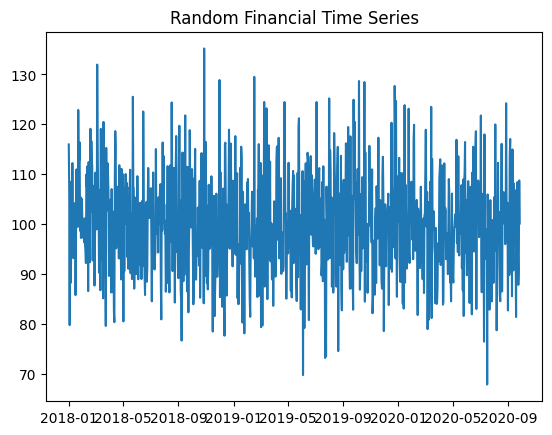

In [17]:
# random financial time series generator

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


data = {
    'Dates': pd.date_range(start='1/1/2018', periods=1000),
    'Price': np.random.normal(100, 10, 1000)
}

df = pd.DataFrame(data)
df.set_index('Dates', inplace=True)
plt.plot(df)
plt.title('Random Financial Time Series')
plt.show()


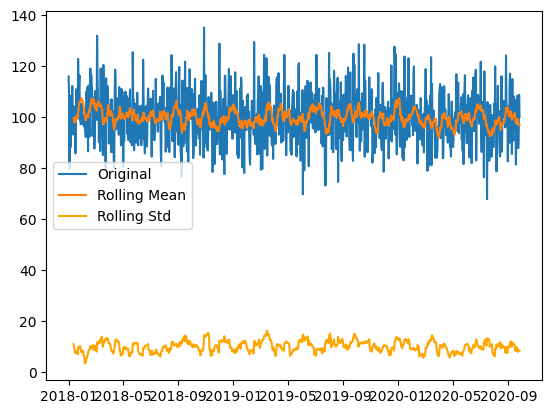

In [18]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std', color='orange')
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['Price'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("Reject null hypothesis: The series is stationary.")
else:
    print("Fail to reject null hypothesis: The series is non-stationary.")

ADF Statistic: -31.44337054069858
p-value: 0.0
Critical Values: {'1%': np.float64(-3.4369127451400474), '5%': np.float64(-2.864437475834273), '10%': np.float64(-2.568312754566378)}
Reject null hypothesis: The series is stationary.


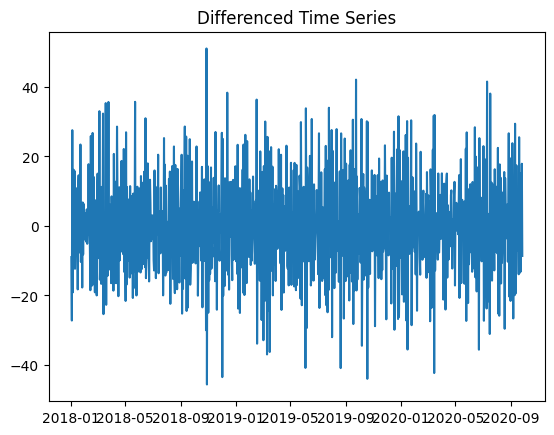

Differenced ADF Statistic: -11.547066226150598
p-value: 3.520149169054832e-21


In [21]:
data_diff = df.diff().dropna()

plt.plot(data_diff)
plt.title('Differenced Time Series')
plt.show()

# Re-test with ADF or KPSS
result = adfuller(data_diff['Price'])
print(f"Differenced ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

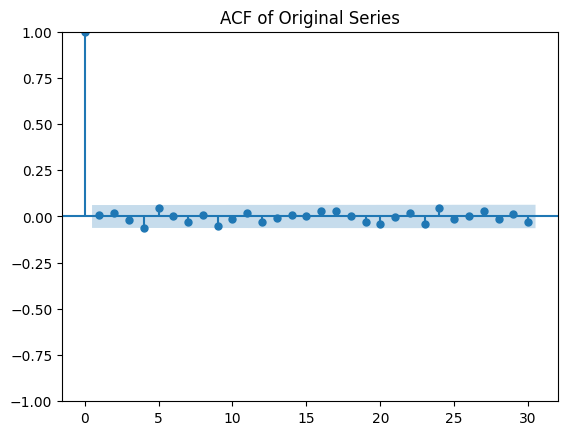

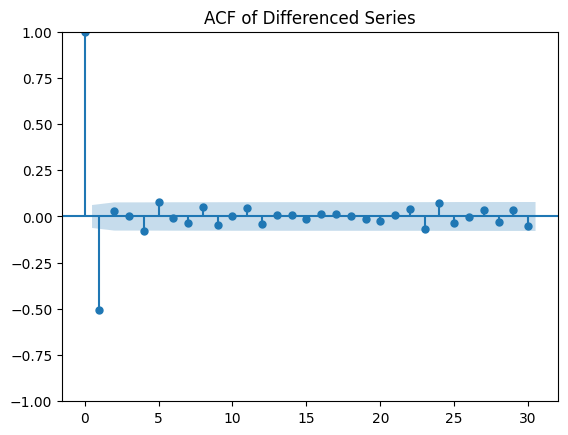

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df)
plt.title('ACF of Original Series')
plt.show()

plot_acf(data_diff)
plt.title('ACF of Differenced Series')
plt.show()